In [2]:
import torch
import matplotlib.pyplot as plt

torch.Size([10, 1])
torch.Size([10, 1])


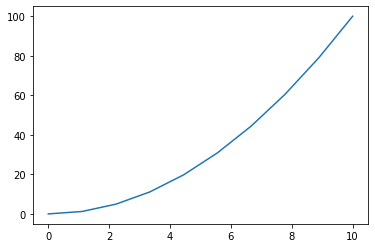

In [62]:
x = torch.linspace(0,10,10)[:,None]
y = x**2

print(x.shape)
print(y.shape)

plt.plot(x, y)

In [63]:
import torch.nn as nn

def LinearTanh(n_in, n_out):
    # do not work with ModuleList here either.
    block = nn.Sequential(
      nn.Linear(n_in, n_out),
      nn.Tanh()
    )
    return block

class MLP(nn.Module):
    
    def __init__(self, dim_layers):
        super(MLP, self).__init__()
        layers = []
        num_layers = len(dim_layers)
        
        blocks = []
        for l in range(num_layers-2):
            blocks.append(LinearTanh(dim_layers[l], dim_layers[l+1]))
            
        blocks.append(nn.Linear(dim_layers[-2], dim_layers[-1]))
        blocks.append(nn.Sigmoid())
        self.network = nn.Sequential(*blocks)
    
    def forward(self, x):
        return 100*self.network(x)

In [65]:
mlp = MLP([1]+[64]+[1])
print(mlp)
x = x.to('cuda:0')
y = y.to('cuda:0')
mlp.to('cuda:0')

optimiser = torch.optim.Adam(mlp.parameters(), lr=1e-3)

for i in range(int(10e5)):
    optimiser.zero_grad()
    
    x.requires_grad_(True)
    y_hat = mlp(x)
    dy_x = torch.autograd.grad(y_hat, x, torch.ones_like(y_hat), create_graph=True)[0]
    
    loss1 = torch.norm(y_hat - x**2)**2
    loss2 = torch.norm(dy_x - 2*x)**2
    loss = loss1 + loss2
    
    loss.backward()
    optimiser.step()
    
    if i % 1000 == 0:
        print(y_hat[0], x[0]**2)
        print(loss.item())

MLP(
  (network): Sequential(
    (0): Sequential(
      (0): Linear(in_features=1, out_features=64, bias=True)
      (1): Tanh()
    )
    (1): Linear(in_features=64, out_features=1, bias=True)
    (2): Sigmoid()
  )
)
tensor([46.0174], device='cuda:0', grad_fn=<SelectBackward>) tensor([0.], device='cuda:0', grad_fn=<PowBackward0>)
17129.6953125
tensor([0.9881], device='cuda:0', grad_fn=<SelectBackward>) tensor([0.], device='cuda:0', grad_fn=<PowBackward0>)
437.9843444824219
tensor([0.3856], device='cuda:0', grad_fn=<SelectBackward>) tensor([0.], device='cuda:0', grad_fn=<PowBackward0>)
344.2767333984375
tensor([0.1782], device='cuda:0', grad_fn=<SelectBackward>) tensor([0.], device='cuda:0', grad_fn=<PowBackward0>)
296.5328369140625
tensor([0.1084], device='cuda:0', grad_fn=<SelectBackward>) tensor([0.], device='cuda:0', grad_fn=<PowBackward0>)
254.9739227294922
tensor([0.0771], device='cuda:0', grad_fn=<SelectBackward>) tensor([0.], device='cuda:0', grad_fn=<PowBackward0>)
215.30944

KeyboardInterrupt: 

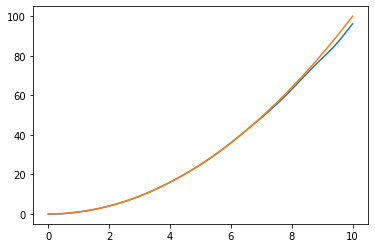

In [68]:
plt.plot(x.detach().to('cpu'), mlp(x).detach().to('cpu'))
plt.plot(x.detach().to('cpu'), (x**2).detach().to('cpu'))

torch.Size([10, 1])
torch.Size([10, 1])


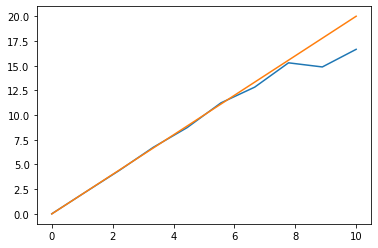

In [70]:
device = 'cuda:0'
x = torch.linspace(0,10,10)[:,None].to(device)
x.requires_grad_(True)
y_hat = mlp(x)

print(x.shape)
print(y_hat.shape)

dy_x = torch.autograd.grad(y_hat, x, torch.ones_like(y_hat), create_graph=True)[0]

plt.plot(x.detach().cpu(), dy_x.detach().cpu())
plt.plot(x.detach().cpu(), (2*x).detach().cpu())